# **Project Name**    - Retail Sales Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Md Ismail Quraishi

# **Project Summary -**

Rossmann operates over 3000 drug stores in 7 Europeon countries. Currently rossmann store manager are tasked with predicting their daily sales for upto six weeks in advance. Store sales are influenced by many factors including promotions, competiton, school and state holiday, seasonality and locality. With thousands of managers predicting sales based on their unique circumstances, the accuracy of result can be quite varied. I am provided with historical sales data for 1115 Rossmann stores. My task is to forcast sales columns for the test set. I am provided  with two datasets Rossmann_df and store_df first of all I will read the dataset and try to understand the datasets, then I will check some basic informations like missing values, what all the columns are, descriptions of the dataset. then I will perform data wrangling after that I will visualize some important charts and try to understand them. Then I will handle missing values and outliers. After that I will merge the dataset do feature engineering and also data encoding. Next splitting  the dataset for train and test purpose, after that I will do dimention reduction, data transformation and normalization/standardization. Then I will apply for machine learning algorithm, predicting the data and also evaluate the model. At last I will have to make some conclusion about the project.

# **GitHub Link -**

https://github.com/mdismailquraishicse/capstone_project_3_regression

# **Problem Statement**


Sales prediction is extremely important for any business as it forcast the sales for the clients who want to stock some product for  future. I have two dataset for this project 'Rossmann Stores Data.csv' and 'store.csv'. 'Rossmann Stores Data.csv' has 1017209 rows and 9 columns and 'store.csv' has 1115 rows and 10 columns. I have to do data analysis first for both the datasets and then merge the data after merging the data my task is to apply machine learning regression algorithm to predict the salling price.

**Make a model which is able to predict future sales**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from numpy import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind,ttest_1samp,t,norm
import preprocessing
import model_evaluation as me
import warnings
warnings.filterwarnings('ignore')

C:\Users\Admin\AppData\Local\Temp\ipykernel_4408\1084874672.py:11: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Dataset Loading

In [2]:
# Load Dataset
path_rossmann = 'cleaned_data/rossmann_eda_done.csv'
path_store = 'cleaned_data/store_eda_done.csv'

rossmann_df = pd.read_csv(path_rossmann)
store_df = pd.read_csv(path_store)
rossmann_df.drop('Unnamed: 0', axis=1, inplace=True)
store_df.drop('Unnamed: 0', axis=1, inplace=True)

### Dataset First View

In [3]:
# Dataset First Look rossmann
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year
0,1,5,2015-07-31,5263,555,1,0,1,2015
1,2,5,2015-07-31,6064,625,1,0,1,2015
2,3,5,2015-07-31,8314,821,1,0,1,2015
3,4,5,2015-07-31,13995,1498,1,0,1,2015
4,5,5,2015-07-31,4822,559,1,0,1,2015


In [4]:
# First view for store_df
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2
0,1,c,a,7.147559,0
1,2,a,a,6.347389,1
2,3,a,a,9.556126,1
3,4,c,c,6.431331,0
4,5,a,a,10.305982,0


In [5]:
# Merging two datasets to make final dataset on a commont column 'Store'
final_df = rossmann_df.merge(store_df,how='left', on='Store')
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,0,1,2015,c,a,7.147559,0
1,2,5,2015-07-31,6064,625,1,0,1,2015,a,a,6.347389,1
2,3,5,2015-07-31,8314,821,1,0,1,2015,a,a,9.556126,1
3,4,5,2015-07-31,13995,1498,1,0,1,2015,c,c,6.431331,0
4,5,5,2015-07-31,4822,559,1,0,1,2015,a,a,10.305982,0


### Dataset Rows & Columns count

In [6]:
# show basic info
eda.showSCDMU(final_df)

 Rows and columns count for rossmann_df : (844392, 13)

columns :  ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday', 'year', 'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2']

duplicates counts : 0

Nan\missing count :
Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Promo                  0
StateHoliday           0
SchoolHoliday          0
year                   0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

Unique Count :
Store                   1115
DayOfWeek                  7
Date                     942
Sales                  21734
Customers               4086
Promo                      2
StateHoliday               4
SchoolHoliday              2
year                       3
StoreType                  4
Assortment                 3
CompetitionDistance      655
Promo2                  

### Dataset Information

In [7]:
# Dataset Info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844392 non-null  int64  
 1   DayOfWeek            844392 non-null  int64  
 2   Date                 844392 non-null  object 
 3   Sales                844392 non-null  int64  
 4   Customers            844392 non-null  int64  
 5   Promo                844392 non-null  int64  
 6   StateHoliday         844392 non-null  object 
 7   SchoolHoliday        844392 non-null  int64  
 8   year                 844392 non-null  int64  
 9   StoreType            844392 non-null  object 
 10  Assortment           844392 non-null  object 
 11  CompetitionDistance  844392 non-null  float64
 12  Promo2               844392 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 83.7+ MB


In [8]:
# Dataset Describe
final_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,year,CompetitionDistance,Promo2
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580,2013.831937,7.644903,0.498684
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103,0.777260,1.558270,0.499999
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,3.044522,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000,2013.000000,6.566672,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000,2014.000000,7.751905,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000,2014.000000,8.836519,1.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,2015.000000,11.236658,1.000000


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Mean and sum of the sales groupby promo2

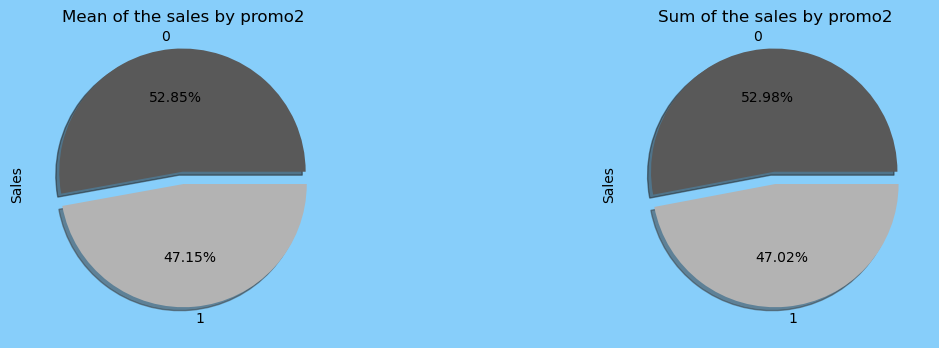

In [9]:
facecolor = 'lightskyblue'
fig, ax = plt.subplots(ncols=2, nrows=1, facecolor=facecolor, figsize=(14,4))
final_df.groupby(['Promo2'])['Sales'].mean().plot.pie(ax=ax[0], shadow=True, explode=[0.1,0], autopct='%0.2f%%', colors=['#595959','#b3b3b3'])
final_df.groupby(['Promo2'])['Sales'].sum().plot.pie(ax=ax[1], shadow=True, explode=[0.1,0], autopct='%0.2f%%', colors=['#595959','#b3b3b3'])
ax[0].set_title('Mean of the sales by promo2')
ax[1].set_title('Sum of the sales by promo2')
plt.show()

1. Mean of the sales and sum of the sales both are almost equal, when promo2 = 1 then sales happened 47%  and when promo2= 0 then 52% approximately.
2. After the above visualization we can conclude that promo2 is not helpful for growing business because sales decreased after introducing promo2.
3. I don't think  this feature will be helpful for model building because mean and sum are nearly equal.

### Chart 2 - Sales by Store Typewise

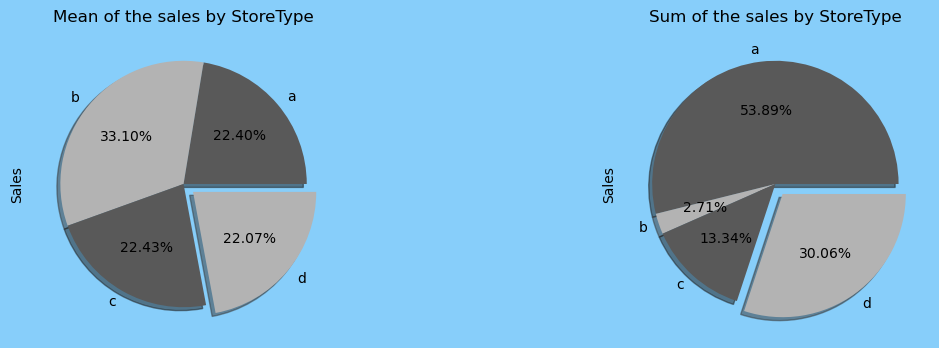

In [10]:
fig, ax = plt.subplots(ncols=2, nrows=1, facecolor=facecolor, figsize=(14,4))
final_df.groupby(['StoreType'])['Sales'].mean().plot.pie(ax=ax[0], shadow=True, explode=[0,0.,0,0.1], autopct='%0.2f%%', colors=['#595959','#b3b3b3'])
final_df.groupby(['StoreType'])['Sales'].sum().plot.pie(ax=ax[1], shadow=True, explode=[0,0, 0,0.1], autopct='%0.2f%%', colors=['#595959','#b3b3b3'])
ax[0].set_title('Mean of the sales by StoreType')
ax[1].set_title('Sum of the sales by StoreType')
plt.show()

1. Mean sales in case of type b is highest that is 33% approx while mean sales for rest of the types are almost equal 22% approx.
2. Sum of the Sales also different for different types.
3. Therefore we can the column will be helpful for prediction.

### Chart 3 - Outliers visualization by boxplot

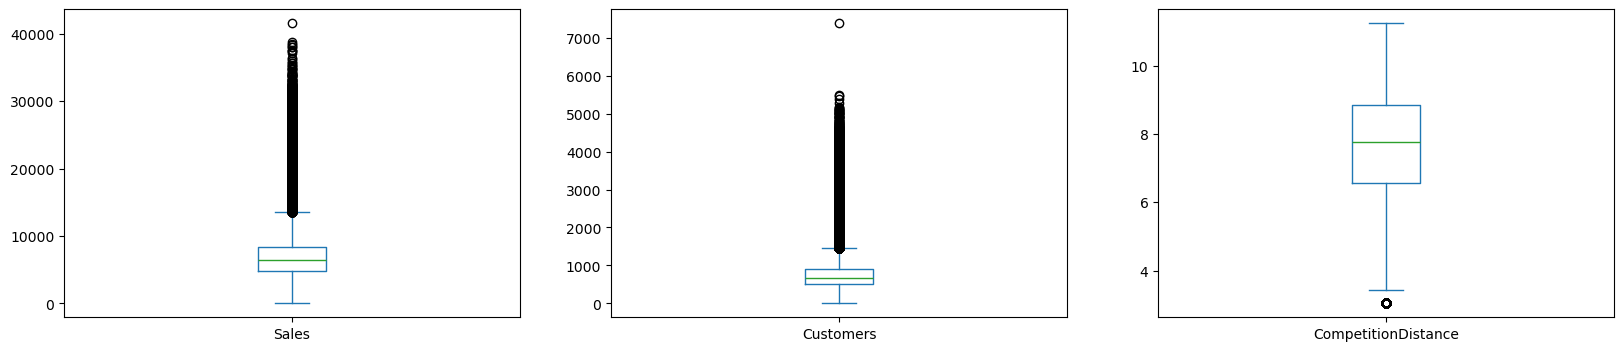

In [11]:
final_df[['Sales', 'Customers', 'CompetitionDistance']].plot.box(subplots=True, figsize=(20,4))
plt.show()

1. From the above figure we can observe presence of outliers in the columns Sales, Customers, and CompetitionDistance.
2. Outliers are the observations distant from the mean of the data.
3. Outliers may lead to bad prediction therefore we need to  treat them before model building.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer here.

*   Mean sale for promo = 1 is greater than or equal to the mean sale when promo = 0.
*   Mean sale  is 0 when shop is closed.
*   Mean sale for store type b is equal to mean sales of a+b+c.

### Hypothetical Statement - 1
* Mean Sale for promo = 1 is equal to mean sale for promo = 0.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   Mean sale for promo = 1 is greater than or equal to the mean sale when promo = 0.
* H0: promo_mean >= non_promo_mean
* H1: promo_mean < non_promo_mean

#### 2. Perform an appropriate statistical test.

In [12]:
# Perform Statistical Test to obtain P-Value

s1 = final_df[final_df['Promo']== 1]['Sales']
s2 = final_df[final_df['Promo']== 0]['Sales']

dof = len(s1)+len(s2)-2
alpha = 1-0.05
lower = t.ppf(alpha,dof)
statistic, p_value = ttest_ind(s1,s2,equal_var=False, alternative='less')

print('dof',dof)
print('alpha ',alpha)
print(f"lower bound : {lower}")
print(f"Statistic : {statistic}  p_value : {p_value}")
if  statistic < lower:
  print('Null hypothesis is rejected')
else :
  print('Failed to reject null hypothesis')

dof 844390
alpha  0.95
lower bound : 1.6448554315332764
Statistic : 356.6357238880086  p_value : 1.0
Failed to reject null hypothesis


##### Which statistical test have you done to obtain P-Value?

I have done T-test to get P_value.

##### Why did you choose the specific statistical test?

Because my sample size and variance are not same.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Mean sale for store type b is equal to mean sales of a+c+d.
* H0: E[b] = E[a+c+d]
* H1: E[b] != E[a+c+d]

#### 2. Perform an appropriate statistical test.

In [13]:
# Perform Statistical Test to obtain P-Value
sa = final_df[final_df['StoreType'] == 'a']['Sales']
sb = final_df[final_df['StoreType'] == 'b']['Sales']
sc = final_df[final_df['StoreType'] == 'c']['Sales']
sd = final_df[final_df['StoreType'] == 'd']['Sales']
# mean1 = sb.mean()
mean2 = sa.mean()+sc.mean()+sd.mean()
dof = len(sa)-1
lower = t.ppf(0.025,dof)
upper = t.ppf(0.975,dof)
stat,p_value = ttest_1samp(sa,mean2)

print(f"lower : {lower} and upper :{upper}")
print(f'Statistic :{stat} and p_value: {p_value}')
if stat < lower or stat > upper:
  print('Null hypothesis is rejected')
else:
  print('null hypothesis is accepted')

lower : -1.9599691746559331 and upper :1.9599691746559327
Statistic :-2837.0286913926384 and p_value: 0.0
Null hypothesis is rejected


##### Which statistical test have you done to obtain P-Value?

I have done t statistic test.

##### Why did you choose the specific statistical test?

Because standard daviation of the samples were different.

## ***6. Feature Engineering & Data Pre-processing***

In [14]:
# Handling Missing Values & Missing Value Imputation
df = final_df.copy()
col_to_drop = ['year','Promo2']
df.drop(columns=col_to_drop,inplace=True)
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance
0,1,5,2015-07-31,5263,555,1,0,1,c,a,7.147559
1,2,5,2015-07-31,6064,625,1,0,1,a,a,6.347389
2,3,5,2015-07-31,8314,821,1,0,1,a,a,9.556126
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,6.431331
4,5,5,2015-07-31,4822,559,1,0,1,a,a,10.305982


### 2. Handling Outliers

In [15]:
# Outlier handling by capping values
print('final_df shape : ',final_df.shape)
print('Shape when Sales are 0. : ',final_df[final_df['Sales']<=0].shape) # I am considering it as outliers when Sales 0.
final_df = final_df[df['Sales']>0] # drop rows when Sales 0.
df['Sales'] = preprocessing.outliers_capping(df['Sales']) # Outliers treatment Saleswise
df['Customers'] = preprocessing.outliers_capping(df['Customers']) # Outliers treatment Customerswise
df['CompetitionDistance'] = preprocessing.outliers_capping(df['CompetitionDistance']) # Outliers treatment CompetitionDistanceWise
print('Shape after outliers treatment : ', final_df.shape)

final_df shape :  (844392, 13)
Shape when Sales are 0. :  (54, 13)
lower :  -392.5
upper :  13611.5
lower :  -42.0
upper :  1454.0
lower :  3.1619021707043817
upper :  12.241289528301339
Shape after outliers treatment :  (844338, 13)


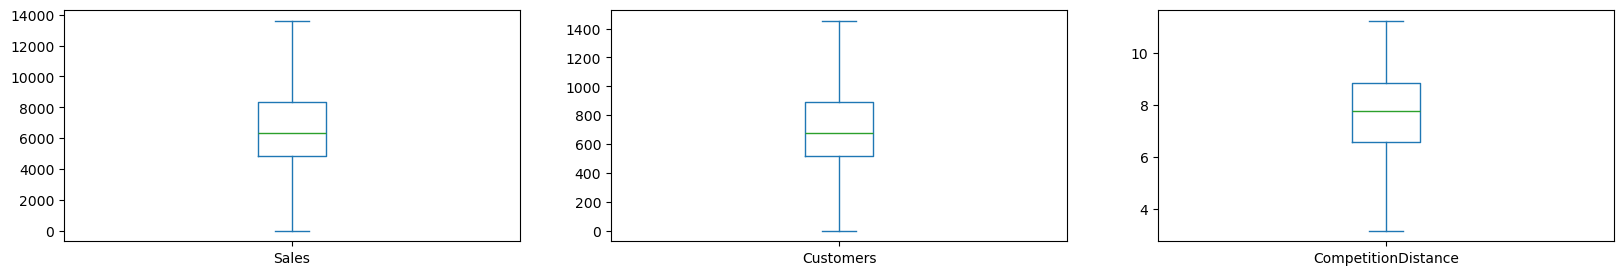

In [16]:
# Boxplot after outlier treatment
df[['Sales', 'Customers', 'CompetitionDistance']].plot.box(subplots=True, figsize=(20,3))
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I just used capping method to limit the outliers in a specific range. I could drop the outliers because we have enough data but I did not dropped them because dropping is not good approach always.

### 3. Categorical Encoding

In [17]:
# Onehot encoding
df = pd.get_dummies(df, columns=['Assortment', 'StoreType', 'StateHoliday'], dtype='int64')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Here I did one hot encoding to StateHoliday, StoreType and Assortment columns because onehot encoding treat all the values equal it does not create biasness.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [18]:
# Manipulate Features to minimize feature correlation and create new features
# from str to date time conversion
df['Date'] = df['Date'].apply(lambda col: datetime.strptime(col,'%Y-%m-%d'))
# creating day, month, year columns
df['day'] = df['Date'].apply(lambda d: d.day)
df['month'] = df['Date'].apply(lambda m: m.month)
# Dropping Date column
df.drop(columns=['Date'], inplace=True)

In [19]:
#Multicollinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

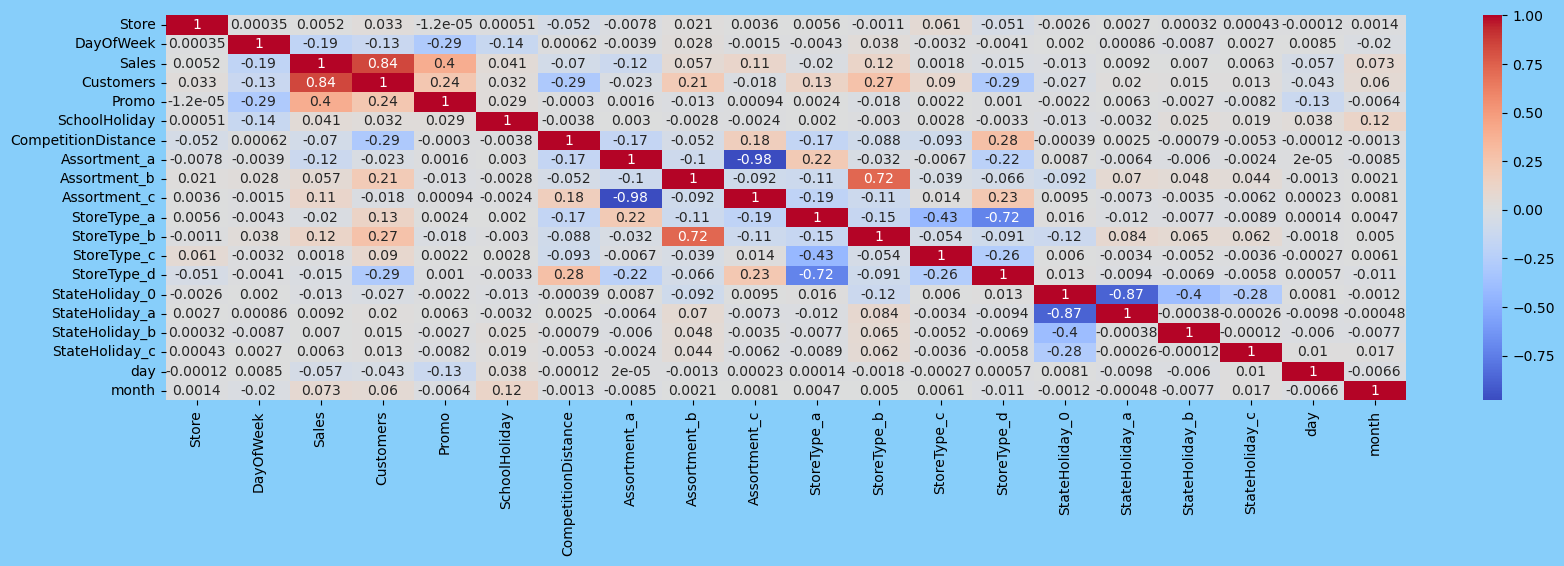

In [20]:
corr = df.corr()
plt.figure(figsize=(20,5), facecolor=facecolor)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

1. Assortment_a and Assortment_c are 98% correlated drop one of them.
2. StateHoliday_1 and StateHoliday_0 are 100% correlated. drop one of them.
3. StoreType_a is highly correlated with multiple variables.
4. CompetitionDistance is highly correlated with multiple variables.

In [21]:
# Multicolinearitiy check
high_vif_col=['Sales','Assortment_a', 'StateHoliday_a', 'StateHoliday_0', 'StoreType_a', 'CompetitionDistance']
vif_df = calc_vif(df[[i for i in df.describe().columns if i not in high_vif_col ]])
vif_df

,variables,VIF
0,Store,3.618315
1,DayOfWeek,4.168554
2,Customers,6.641774
3,Promo,2.005895
4,SchoolHoliday,1.274501
5,Assortment_b,2.120276
6,Assortment_c,1.991765
7,StoreType_b,2.237080
8,StoreType_c,1.251716
9,StoreType_d,1.662369


#### 2. Feature Selection

In [22]:
# selected features
selected_features = list(vif_df['variables'])
selected_features.append('Sales')
X = df[selected_features]

##### What all feature selection methods have you used  and why?

I simply used vif method to find good featues with low vif.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

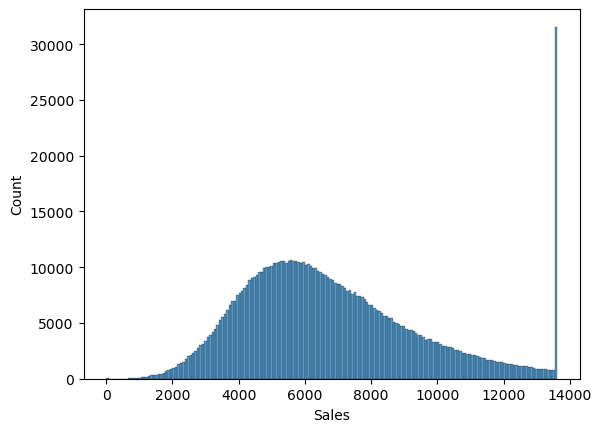

In [23]:
# Transform Your data
sns.histplot(df['Sales'])
plt.show()

Since the distribution of the data is almost normal therefore I decided not to do transformation.

### 6. Data Scaling

In [24]:
# Scaling your data
minmaxScaler = MinMaxScaler()
X[['Customers','Sales']] = minmaxScaler.fit_transform(X[['Customers','Sales']])

##### Which method have you used to scale you data and why?

I used minmax scaler bacause my data was normally distributed only I need to scale it.

### 8. Data Splitting

In [25]:
# Split your data to train and test. Choose Splitting ratio wisely.
y = X['Sales']
X.drop('Sales', axis=1, inplace= True)
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size=.2)
print('xtrain shape : ', xtrain.shape)
print('ytrain shape : ', ytrain.shape)
print('xtest shape : ', xtest.shape)
print('ytest shape : ', ytest.shape)

xtrain shape :  (675513, 14)
ytrain shape :  (675513,)
xtest shape :  (168879, 14)
ytest shape :  (168879,)


##### What data splitting ratio have you used and why? 

I choose 20% for test and rest 80% to train my model because more data is needed to train a model well.

## ***7. ML Model Implementation***

### ML Model - 1 - Decission Tree Regression

In [26]:
# Fitting decission tree regressor
dtrModel = DecisionTreeRegressor()
dtrModel.fit(xtrain,ytrain)

# Predicting
pred_train = dtrModel.predict(xtrain)
pred_test = dtrModel.predict(xtest)

In [27]:
me.showMetrics(ytrain,ytest, pred_train, pred_test)

train mean squared error :  0.0
test mean squared error :  0.003342515855287103

train r2score:  1.0
test r2score :  0.9158326764546849


#### 2. Cross- Validation & Hyperparameter Tuning

In [28]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
grid_params = {'max_depth' : [12,13,14],'random_state':[1]}
grid_model = GridSearchCV(estimator=dtrModel,cv= 20, param_grid=grid_params, verbose=2)

# Fit the Algorithm
grid_model.fit(xtrain,ytrain)
bestDtrEstimator = grid_model.best_estimator_
# Predict on the model
pred_train = bestDtrEstimator.predict(xtrain)
pred_test = bestDtrEstimator.predict(xtest)

Fitting 20 folds for each of 3 candidates, totalling 60 fits
[CV] END .......................max_depth=12, random_state=1; total time=   2.3s
[CV] END .......................max_depth=12, random_state=1; total time=   2.4s
[CV] END .......................max_depth=12, random_state=1; total time=   2.4s
[CV] END .......................max_depth=12, random_state=1; total time=   2.3s
[CV] END .......................max_depth=12, random_state=1; total time=   2.4s
[CV] END .......................max_depth=12, random_state=1; total time=   2.4s
[CV] END .......................max_depth=12, random_state=1; total time=   2.4s
[CV] END .......................max_depth=12, random_state=1; total time=   2.4s
[CV] END .......................max_depth=12, random_state=1; total time=   2.4s
[CV] END .......................max_depth=12, random_state=1; total time=   2.3s
[CV] END .......................max_depth=12, random_state=1; total time=   2.3s
[CV] END .......................max_depth=12, ra

In [29]:
# Metrices
print('best parameters : ', grid_model.best_params_)
me.showMetrics(ytrain,ytest, pred_train, pred_test)

best parameters :  {'max_depth': 14, 'random_state': 1}
train mean squared error :  0.004358665550708309
test mean squared error :  0.004802807311305053

train r2score:  0.8907300432948044
test r2score :  0.8790613255410585


1. Before cross validation we can see that the model was overfit because train r2_score for train data is 100% and test r2_score 91%.
2. After cross validation not only train r2_score decreased but also test score increased by 2%.
3. During this cross validation I tuned max_depth hyper parameter.

### ML Model - 2 - XGBoostRegressor

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [30]:
xgbModel = XGBRegressor(random_state=0)
# Fit the Algorithm
xgbModel.fit(xtrain,ytrain)
# Predict on the model
pred_train = xgbModel.predict(xtrain)
pred_test = xgbModel.predict(xtest)

In [31]:
# Visualizing evaluation Metric Score chart
me.showMetrics(ytrain,ytest, pred_train, pred_test)

train mean squared error :  0.0028372014711609377
test mean squared error :  0.0028998929036998834

train r2score:  0.9288725234109112
test r2score :  0.9269782897554852


#### 2. Cross- Validation & Hyperparameter Tuning

In [32]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
grid_params = {'random_state' :[0],'n_estimators': [400,500], 'n_jobs':[-1]}
grid_model = GridSearchCV(estimator=xgbModel,cv= 5, param_grid=grid_params,verbose=2, n_jobs=-1)

# Fit the Algorithm
grid_model.fit(xtrain,ytrain)
bestXGBEstimator = grid_model.best_estimator_

# Predict on the model
pred_train = bestXGBEstimator.predict(xtrain)
pred_test = bestXGBEstimator.predict(xtest)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [33]:
# Visualizing evaluation Metric Score chart
# Metrices
print('best parameters : ',grid_model.best_params_)
me.showMetrics(ytrain, ytest, pred_train, pred_test)

best parameters :  {'n_estimators': 500, 'n_jobs': -1, 'random_state': 0}
train mean squared error :  0.001674234758330919
test mean squared error :  0.0018251172769106667

train r2score:  0.9580276216587842
test r2score :  0.9540420321085687


1. I choose number of estimators for hyperparameter tuning to achieve better r2score and after tuning the hyperparameters I have found that my model is performing better than before.
2. As this is a regression problem therefore I choose r2score because r2score shows how good the regression line fit.
3. before the hyper parameter tuning r2_score was 93% but after tuning the hyper parameter it became 95%.

From the above model I would choose bestXGBEstimator for prediction.

In [34]:
# pred * (max-min) + max

# **Conclusion**

**Here are some solutions to predict sales**
1. Delete the observations when stores are not opened and also delete the column open because it will contain constant value.
2. Target column follows normal distribution if I remove zeros from the data.
3. Sum of the sale is least on day 7 it is because mostly on day 7 stores are not opened.
4. Average sale is more than 60% in case of promo.
5. Average sale is high when there is school holiday.
6. Average sale in case of state holiday is less than 3% for each a,b and c.
7. Average sales for store type b is highest that is 37% and for type a,c,d is approximately 21%.
8. Average sales for assortment b is highest that is more than 42% and for a and c are 27.3% and 30.2% respectively.
9. Average sales for promo2 is only 47%.
10. We can deploy the model with XGBoost algorithm. Because for training and test dataset, I found 85% r2 scores, 903 and 912 root mean squared error respectively.
11. No overfitting is seen.